In [2]:
import pandas as pd
import numpy as np 

import scipy.stats as ss
from scipy.stats import t
from scipy.stats import binom
from scipy.stats import norm
import scikit_posthocs as sp                 # sp.posthoc_conover()  用于Post Hoc Test   

import statsmodels.api as sm                               # 方差分析
import statsmodels.stats.weightstats as ssw                 # 统计类 用于 统计描述
from statsmodels.stats import contingency_tables as tbl     # 卡方检验需要的列联表对象
from statsmodels.stats import power as spower               # 样本量/检验效能
from statsmodels.stats import proportion as sprop           # 二项及多项分布检验
from statsmodels.formula.api import ols        # ols 最小二乘法

import matplotlib.pyplot as plt

# Statistical Inference 

- How to use data to <font color='blue'>estimate parameters</font>,such as <font color='red'>**Proportion, mean, mean difference**</font> and <font color='blue'> test theories about  parameters </font> <font color='red'>including **two population Means and a population proportion**</font> <font color='blue'>with confidence</font>.
- Calculate method:
    - Using formula;
    - Using **statsmodels** module;


## Confidence Intervals
- **Confidence intervals** are a calculated range around a statistic that is supported mathematically with a certain level of confidence.
    - 95% confidence level refers to our **confidence in the statistical procedure** that was used to make this interval.
    
<font color='red'>
\begin{align} Best~ Estimate &\pm t_{\nu/2} * SE \nonumber\\
SE =& \sqrt{\frac{p(1-p)}{n}} ~~~~ (Proportion)\nonumber\\
SE =& \frac{\sigma}{\sqrt{n}} ~~~~~~~~~~~~~~~~~ (Mean) \nonumber\\
SE =& \sqrt{SE_1^2+SE_2^2} ~~~~ (Two~populations~Difference)\end{align}</font>
For samples with more than 30 observations and a confidence level of 95%, the $t_{\nu/2}$ is 1.96.

## Confidence intervals for Population <font color='red'>Proportion
Question: A sample of 659 parents with a toddles was taken and asked if they used a car seat for all travel with their toddler. 559 parents reponded Yes to this question. Construct a 95% confidence interval for the population proportion of parents reporting they use a car seat for all travel with their toddler.

```Python
statsmodels.stats.proportion_confint(     # 二项分布指标的率的可信区间的上下限
                count                                # 成功次数
                nobs                                 # 样本总数
                alpha = 0.5                          
                method = 'normal'                    # 可信区间的计算方法，正态近似法
                        'agresti_coull'              # Agresti-Coull interval
                        'beta'                       # clopper-pearson interval based on Beta distribution
                        'wilson'                     # wilson score interval
                        'jeffreys'                   # Jeffreys Bayesian interval
                        'binom_test')                # experimental, inversion of binom_test
``` 

In [2]:
# Use formular
t = 1.96
p = 559/659
n = 659
se = np.sqrt(p*(1-p)/n)

lb = p - t*se
ub = p + t*se
print('between',lb,'and',ub)

between 0.8208622940192611 and 0.8756475694101773


In [3]:
sm.stats.proportion_confint(559, 659, alpha = 0.05)

(0.8208627973654069, 0.8756470660640315)

## Confidence interval for Population <font color='red'>Mean:
```Python
statsmodels.stats.DescrStatsW(df["CWDistance"]).tconfint_mean(      # 计算均数的可信区间
                        alpha = 0.05
                        alternative = 'two-sided'） # 结果输出：可信区间的上下限                         
```

In [4]:
df = pd.read_csv("CCSS_sample/Cartwheeldata.csv")

In [5]:
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
n = len(df)

t = 2.064       # 99% confident level
se = sd/np.sqrt(n)

lcb = mean - t * se
ucb = mean + t * se
(lcb, ucb)

(76.26382957453707, 88.69617042546294)

In [6]:
sm.stats.DescrStatsW(df["CWDistance"]).tconfint_mean(alpha = 0.05)

(76.26413507754478, 88.69586492245523)

## Confidence interval for Two Population <font color='red'>Proportions Difference 

<font color='blue'>**Question:**</font> Analyze the difference of proportion between female and male smokers "SMQ020". 

In [7]:
da = pd.read_csv('CCSS_sample/nhanes_2015_2016.csv')
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
dx = da[["SMQ020x", "RIAGENDRx","BMXBMI"]].dropna()
dx.head()

,SMQ020x,RIAGENDRx,BMXBMI
0,Yes,Male,27.8
1,Yes,Male,30.8
2,Yes,Male,28.8
3,No,Female,42.4
4,No,Female,20.3


In [8]:
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2044,1322
Yes,896,1390


In [9]:
se_female = np.sqrt(896/(896+2044) * (1 - 896/(896+2044))/(896+2044))
se_male = np.sqrt(1390/(1390+1322) * (1 - 1390/(1390+1322))/ (1390+1322))
se_diff = np.sqrt(se_female**2 + se_male**2)

d = 1390/(1390+1322) - 896/(896+2044)
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(0.18265990490786876, 0.2328900318810061)

## Confidence interval for  Two Population <font color='red'>Mean Difference 

```Python
# d1,d2 are DescrStatsW formats, t-test的d1&d2均数差值可信区间 / z-test的d1&d2均数差值可信区间
statsmodels.stats.weightstatsW.CompareMeans(d1,d2).tconfint_diff([alpha,alternative,usevar])   
statsmodels.stats.weightstatsW.CompareMeans(d1,d2).zconfint_diff([alpha,alternative,usevar])  
```

<font color='blue'>**Question:**</font>
Analyze the difference of mean of body mass index within our female and male populations "BMXBMI". 

In [10]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [11]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)

sem_diff = np.sqrt(sem_female**2 + sem_male**2)
d = 29.939946 - 28.778072
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)

In [12]:
female = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

bmg1 = ssw.DescrStatsW(female["BMXBMI"].dropna())   # female
bmg2 = ssw.DescrStatsW(male["BMXBMI"].dropna())   # male   
ssw.CompareMeans(bmg1,bmg2).tconfint_diff()

(0.7930478678957343, 1.5306992127582104)

# <font color='blue'>Independent</font> Hypothesis Testing 
<font color='red'>
\begin{align} \displaystyle
    z\_score = &\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}
\end{align}</font>
One can calculate the P_value with z_score. If P_value < $\alpha$, then rejecte H0.

## <font color='red'>Proportion</font> for One Population 
- statsmodels
```Python
statsmodels.stats.proportions_ztest(    # output( Z-statisticd, pvalue)
            count,                                 # 成功次数，单一数值/类数组结构列表
            nobs,                                  # 总样本量，单一数值/类数组结构列表
            value,                                 # H0对应的总体率/率差
            alternative = 'two-sided'
            prop_var = False                       # 指定方差分配比例，默认按照样本比例进行计算
            )
```
- 基于卡方的多项分布检验,**检验各个类别出现的概率是否相同**
```Python
statsmodels.stats.proportions_chisquare(     # output(chi2_value,pvalue,(table,expected value))
            count,           # 按列表形式给出各类别频数
            nobs,
            value)           # H0对应的总体率/率差
```
- 基于二项分布的**确切检验**
```Python
statsmodels.stats.binom_test(    # output: pvalue
            count,
            nobs,
            value,               # H0对应的总体率/率差
            alternative = 'two-sided')
```

<font color='blue'>**Question:**</font>
    - In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. 
    - Today, 1018 Parents, 56% believe that their teenager’s lack of sleep is caused due to electronics and social media.
    - Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Null Hypothesis:** p <= 0.52  
**Alternative Hypthosis:** p > 0.52  

In [64]:
n = 1018
p0 = .52
p1 = .56

z_score = (p1-p0)/np.sqrt(p1*(1-p1)/n)
p_values = ss.norm.sf(abs(z_score))*2
(z_score, p_values)

(2.5710677957591126, 0.010138547731721084)

In [14]:
sm.stats.proportions_ztest(p1 * n, n, p0)

(2.571067795759113, 0.010138547731721065)

In [15]:
sm.stats.proportions_chisquare(p1 * n, n, p0)

(6.5256410256410335,
 0.010633021983644915,
 (array([[570.08, 447.92]]), array([[529.36, 488.64]])))

In [16]:
sm.stats.binom_test(p1 * n, n, p0)

0.01104402063287842

## <font color='red'>Proportions Difference</font> for two population

<font color='blue'> $\displaystyle z\_score = \frac{p-p_0}{SE(p)}$    
SE is the standard error of estimate $\displaystyle SE = \sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2})} $
- scipy

```Python
scipy.stats.chi2_contingency(
                observed             # 观察到的列联表，类二维数组结构
                correction = True    # 是否计算Yates校正的卡方结果
                lambda_ = None       # 换用Cressie-Read power divergence family 统计量
                )                    # 输出： 卡方值，P值，自由度，期望频数
```
- statsmodels
```Python
class statsmodels.stats.contingency_table.Table(table,shift_zeros=True) # 如果单元格频数为0，所有单元格频数+0.5防止计算出错
```
    - Table 类的属性

```Python
table_orig                       # 表格原始数据 
marginal_probabilities           # 估计的行列边际概率分布
independec_probabilities         # 基于行列独立的H0假设的单元格概率分布
fittedvalues                     # 期望频数

resid_pearson                    # Pearson残差
standardized_resid               # 标准化残差
chi2_contribs                    # 每个单元格的卡方贡献值
``` 
    - Table 类的方法

```Python
test_nominal_association()      # 无序分类行、列变量的独立性检验, 输出(卡方统计量，自由度，P值)
test_ordinal_association([row_scores,...])      # 有序分类行/列变量的独立性检验，Cochran_Armitage趋势检验
```

<font color='blue'>**Question:**</font>
    - 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons.
    - 308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.
    - Is there a **significant difference** between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?
    - **H0:** p1 - p2 = 0  , **no significant difference**
    - **H1:** p1 - p2 <> 0  ,**has significant difference**

In [61]:
p1 = 0.37
n1 = 247

p2 = 0.39
n2 = 308
p = (p1+p2)/2.0

p12 = p2-p1
sep =np.sqrt(p*(1-p)*(1.0/n1+1.0/n2)) 
z_score1 = (p1-p2)/sep
p_value1 = ss.norm.sf(abs(z_score1))*2 

print('z_score:',z_score1,'Pvalue:',p_value1)

z_score: -0.48241377014578657 Pvalue: 0.6295120409959046


In [18]:
tb1 = pd.DataFrame([[0.37*247,0.63*247],[0.39*308,0.61*308]])
tb1.columns = ['Yes','No']
tb1

,Yes,No
0,91.39,155.61
1,120.12,187.88


In [10]:
tb2 = pd.DataFrame([[0.9*2000,0.1*2000],[0.1*2000,0.9*2000]])
tb2.columns = ['Yes','No']
tb2

# 卡方检验
ss.contingency.expected_freq(tb2)     # 期望频数
ss.chi2_contingency(tb2,False) 

table = tbl.Table(tb2)
table
print(table.table_orig)                # 原始表格
print(table.fittedvalues)              # 期望频数
print(table.resid_pearson)             # Pearson残差
print(table.chi2_contribs)             # 每个单元格的卡方贡献值
print(table.marginal_probabilities)    # 估计的行列边际概率分布
res = table.test_nominal_association()
print("Statistic value is {}, Freedrom Degree is {}, P_value is {}".format(res.statistic,res.df,res.pvalue))

      Yes      No
0  1800.0   200.0
1   200.0  1800.0
      Yes      No
0  1000.0  1000.0
1  1000.0  1000.0
         Yes         No
0  25.298221 -25.298221
1 -25.298221  25.298221
     Yes     No
0  640.0  640.0
1  640.0  640.0
(0    0.5
1    0.5
dtype: float64, Yes    0.5
No     0.5
dtype: float64)
Statistic value is 2560.0000000000005, Freedrom Degree is 1, P_value is 0.0


In [19]:
# 卡方检验
ss.contingency.expected_freq(tb1)     # 期望频数
ss.chi2_contingency(tb1,False)        

(0.23246396496657235,
 0.6297028238097938,
 1,
 array([[ 94.13147748, 152.86852252],
        [117.37852252, 190.62147748]]))

In [20]:
table = tbl.Table(tb1)
table
print(table.table_orig)                # 原始表格
print(table.fittedvalues)              # 期望频数
print(table.resid_pearson)             # Pearson残差
print(table.chi2_contribs)             # 每个单元格的卡方贡献值
print(table.marginal_probabilities)    # 估计的行列边际概率分布
res = table.test_nominal_association()
print("Statistic value is {}, Freedrom Degree is {}, P_value is {}".format(res.statistic,res.df,res.pvalue))

      Yes      No
0   91.39  155.61
1  120.12  187.88
          Yes          No
0   94.131477  152.868523
1  117.378523  190.621477
        Yes        No
0 -0.282564  0.221731
1  0.253041 -0.198563
        Yes        No
0  0.079843  0.049164
1  0.064030  0.039427
(0    0.445045
1    0.554955
dtype: float64, Yes    0.381099
No     0.618901
dtype: float64)
Statistic value is 0.232463964966573, Freedrom Degree is 1, P_value is 0.6297028238097933


Explaination:
**H0:** p1 - p2 = 0  , **no significant difference**

P_vale < 0.05, reject H0  ----->     p1 and p2 are significant difference

P_vale > 0.05, can't reject H0  ----->     No evidence for p1 and p2 are significant difference

## <font color='red'>Mean</font> for one population

-  Scipy
```Python
scipy.stats.ttest_1samp(   # This is a two-sided test for the null hypothesis
    a                      # 类list格式的样本数据
    popmean                # H0所对应的总体均数
```
- statsmodels

```Python
sm.stats.DescrStatsW(df["CWDistance"]).ttest_mean(         # 进行单样本t检验
                        value = 0                   # H0所对应的总体均值
                        alternative = 'two-sided'/'larger'/'smaller')    # 结果输出：t值，P值，自由度    
```

In [21]:
mu = df["CWDistance"].mean()
mu0 = 80
sigma = df["CWDistance"].std()
n = len(df)

z = (mu-mu0)/(sigma/np.sqrt(n))
p = ss.norm.sf(abs(z)) 
print('z_score:',z,'Pvalue:',p)

z_score: 0.8234523266982027 Pvalue: 0.20512540845395272


In [22]:
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

In [23]:
sm.stats.DescrStatsW(df["CWDistance"]).ttest_mean(value =80, alternative = "larger")

(0.8234523266982028, 0.2091793328533854, 24.0)

In [24]:
ss.stats.ttest_1samp(df["CWDistance"], 80)     # 这是双侧检验

Ttest_1sampResult(statistic=0.8234523266982029, pvalue=0.4183586657067707)

## <font color='red'>Means Difference</font> of Two Populations 
- Scipy
     - **from array**
```Python
scipy.stats.ttest_ind(               # 进行两样本t检验
                    a,b                    # 类数组格式的两组数据
                    equal_var = True       # 两组方差是否齐同，方差不齐时给出 Welch‘s t检验的结果
                    nan_policy = propagate/raise/omit) # 对缺失值的处理,返回Nan/抛出错误/忽略Nan
```
    - **from statistic value**
```Python
scipy.stats.ttest_ind_from_stats(
                mean1,sted1,nobs1,          # nobs: sample size
                mean2,sted2,nobs2,
                equal_var = True)
```
- Statsmodel
    - **Statsmodel**
```Python
sm.stats.ztest(a, b)             # a,b are 类数组格式的两组数据
```
    - **CompareMeans Class**
```Python
class statsmodels.stats.weightstatsW.CompareMeans(d1,d2) # Both d1,d2 should be DescrStatsW formats
```
        - **two mean compare**
```Python
CompareMeans.ttest_ind(                      # output: (t-value,p-value,degrees of freedom)
                alternative = 'two-sided'/'larger'/'smaller',
                usevar = 'pooled'/'unequal',   # pooled: 方差齐, 方差不齐时用 unequal
                value = 0)                     # H0假设所对应的均数差值是否为0,2,...
```
        - **two mean difference up and low limit**
```Python
CompareMeans.ttost_ind(low,upp[,usevar])            # 单侧t-test，两组样本均值差值是否为low，upp
```
        - **z-test**
```Python
CompareMeans.ztest_ind([alternative,usevar,value])          # 两样本z-test
CompareMeans.ztost_ind(low,upp[,usevar])                    # 基于成组z-test的等效性检验
```

In [25]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

zs = (mu1-mu2)/(np.sqrt(sd1**2/n1+sd2**2/n2))
ps = ss.norm.sf(abs(zs)) 
print('z_score:',zs,'Pvalue:',ps)

z_score: 6.267188023490217 Pvalue: 1.838130807926842e-10


In [26]:
ss.ttest_ind(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

Ttest_indResult(statistic=6.1755933531383205, pvalue=7.050275578094527e-10)

In [27]:
ss.ttest_ind_from_stats(
                mu1,sd1,n1,          
                mu2,sd2,n2,
                equal_var = True)

Ttest_indResult(statistic=6.2171369177987605, pvalue=5.420337159518482e-10)

In [28]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

(6.1755933531383205, 6.591544431126401e-10)

In [29]:
d1 = ssw.DescrStatsW(females["BMXBMI"].dropna())
d2 = ssw.DescrStatsW(male["BMXBMI"].dropna())
ssw.CompareMeans(d1,d2).ttest_ind()

(6.175593353138339, 7.05027557809368e-10, 5660.0)

# <font color='blue'> Dependent</font> Hypothesis Testing
## Two dependent Population Means ( 配对)
<font color='red'>**差值的单样本t-test**</font>
<font color='red'>$\displaystyle t=\frac{\bar{D}}{s/\sqrt{n}}$</font>  
- H0:两总体均值<font color='red'>**无差异**</font>，<font color='red'>**差值序列**</font>均值$\mu_0=0$; 
- H1:两总体均值<font color='red'>**有差异**</font>，<font color='red'>**差值序列**</font>均值$\mu_0\neq0$; 
- Scipy
    - 确认配对信息是否的确存在： 
```Python
# output(相关系数，Pvalue), H0: array1 & array2 没有联系，总体相关系数为0
scipy.stats.pearsonr(array1,array2)       
```
    - 配对 t-test
```Python
scipy.stats.ttest_rel(       # output(相关系数，Pvalue)
                    array1,array2         # array_like
                    nan_policy = 'propagate'/'raise'/'omit')
```
- Statmodel
    - 两个界值点的单侧配对t-test 
```Python
statsmodels.stats.ttost.paired       
```
    - 求出差值后用单侧t-test
```Python
DescrStatsW.ttest_mean()
```

In [30]:
ccss_p = pd.read_excel('CCSS_sample/CCSS_sample.xlsx',sheet_name = 'CCSS_pair')
ccss_p.head(2)

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991


In [31]:
ss.ttest_rel(ccss_p.index1,ccss_p.index1n)

Ttest_relResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [32]:
# 直接求出差值并进行单样本t-test
ss.ttest_1samp(ccss_p.index1 - ccss_p.index1n,0)

Ttest_1sampResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [33]:
ssw.DescrStatsW(ccss_p.index1 - ccss_p.index1n).ttest_mean()

(1.1616334792419987, 0.2485614438619105, 87.0)

# Analysis of variance (ANOVA) F-test
## <font color='red'> scipy.stats.f_oneway</font>
- <font color='red'>**多组的均数的比较**</font>, 检验某一个控制因素（分类变量）的差异是否会给观测变量（连续变量）带来显著影响
- <font color='blue'>**H0: 检验组的总体均数是一样的**</font>
- 统计量的含义 
    <font color='blue'>$\displaystyle F = \frac{SSA/(k-1)}{SSE/(n-k)} = \frac{MSA}{MSE}$</font>
\begin{align}  SST &= \sum_{i=1}^k \sum_{j=1}^{n_i} (x_{ij}-\bar{x})^2~~~~~~  ~(Sum~ of~ Squares~Total)\\
            SSA &= \sum_{i=1}^k \sum_{j=1}^{n_i} (\bar{x_i}-\bar{x})^2~~~~~~~ ~(Sum~ of~ Squares~Among~ groups) \\
            SSE &= \sum_{i=1}^k \sum_{j=1}^{n_i} (x_{ij}-\bar{x_i})^2~~~~~~~ ~(Sum~ of~ Squares~Within~ groups) 
\end{align}
    
    
- 适用条件：
        - 独立性：个样本必须是相互独立的随机样本
        - 正态性：样本都来自正态分布的总体
        - 方差齐性：样本来自的总体方差相等
- scipy
```Python
scipy.stats.f_oneway(a,b,c,d)        
```

In [34]:
ccss = pd.read_excel('CCSS_sample/CCSS_sample.xlsx')
a = ccss.query("s0 == '北京'& time == '200704'").index1
b = ccss.query("s0 == '北京'& time == '200712'").index1
c = ccss.query("s0 == '北京'& time == '200812'").index1
d = ccss.query("s0 == '北京'& time == '200912'").index1
ss.levene(a,b,c,d) # default median,方差齐性检验

LeveneResult(statistic=0.44332330387152036, pvalue=0.7221678627997157)

In [35]:
ss.f_oneway(a,b,c,d)

F_onewayResult(statistic=5.630155391280303, pvalue=0.0008777240313291846)

## Post Hoc Test <font color='red'> scikit_posthocs.posthoc_conover</font>
- Post Hoc Test: Multiple comparson procedure.

|Comparisonwise Error Rate (CER) | Number of Comparison | Experimentwise Error Rate (EER)|
|--------------------------|----------------------|--------------------------|
|0.05                      |1                     |0.05|
|0.05                      |3                     |0.14|
|0.05                      |6                     |0.26|
|0.05                      |10                     |0.40|

- $\displaystyle EER = 1-(1-\alpha)^{nc}$, where nc is number of comparisons
- With a statistically conservative multiple comparison method, such as the Tukey or Dunnett method, you control for the EER, so there's a tendency to find fewer significant differences than might otherwise be found. 
    - When you make no adjustments for multiple comparisons, you are likely to find more significant differences than might otherwise be found.
    - If only the comparisonwise error rate is controlled, the overall risk of a Type I error across all the comparisons is increased (and therefore the risk of Type II error is decreased), so the test might find more significant differences than would otherwise be found.
- scikit_posthocs
```Python
scikit_posthocs.posthoc_conover(
            data
            val_col =
            group_col =
            p_adjust = 'bonferroni'/'sidak')
```

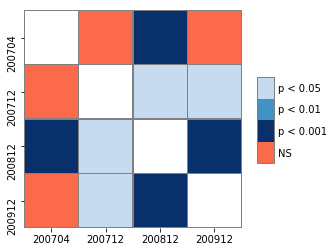

In [36]:
pc = sp.posthoc_conover(ccss,val_col='index1',group_col='time',p_adjust='bonferroni')
cmap = ['1','#fb6a4a','#08306b','#4292c6','#c6dbef']
heatmap_args = {'cmap':cmap, 'linewidths':0.25,'linecolor':'0.5',
                'clip_on':False,'square':True,'cbar_ax_bbox':[0.80,0.35,0.04,0.3]}
sp.sign_plot(pc,**heatmap_args);

# 适用性考察
## 独立性检验
- 采用专门的方差分析模型，或者专门对方差等进行校正
- GEEs、混合效应模型等专门的非独立数据分析模型

## 正态性检验
### <font color='red'> scipy.stats.shapiro

- 假设检验方法考察正态性：<font color='blue'> **H0: 数据服从正态分布**</font>
    - <font color='red'>**Kolmogorov-Smirnov 检验**</font>：
        - 考察H0理论分布（可以是任何分布）下累计先对频数和实际频数间的差异
        - 取频数差值绝对值的最大值为统计量
        - 结论比较严格，即使只有个别案例有偏离也会拒绝H0
```Python
scipy.stats.kstest(a_vector_like_data,'norm')
```
        - Anderson-Darling test: 是KS test的改进
```Python
scipy.stats.anderson(a_vector_like_data,dist='norm')
```
    - <font color='red'>**Shapiro-Wilk 检验**</font>：
        - 基于数据的偏度系数和峰度系数进行正态偏离程度的检验
        - 相对KS检验而言结果更稳妥些
```Python
scipy.stats.shapiro(a_vector_like_data)
```
        - D'Agostino and Pearson's test: 基于峰度和偏度系数进行正态性检验
```Python
scipy.stats.normaltest(a_vector_like_data)
```
    - <font color='red'>**残差分析**</font>：
        - 建模完毕后将残差存储为新变量，就可以进行图形观察甚至正态性检验

In [37]:
ss.kstest(ccss.index1,'norm')

KstestResult(statistic=0.999128160418483, pvalue=0.0)

In [38]:
# 分组进行检验
ks = lambda x: ss.kstest(x,'norm')
ccss.groupby('time').index1.apply(ks)

time
200704                   (1.0, 0.0)
200712    (0.9967105263157895, 0.0)
200812                   (1.0, 0.0)
200912                   (1.0, 0.0)
Name: index1, dtype: object

In [39]:
# 用无参数的分组检验
ccss.groupby('time').index1.apply(ss.shapiro)

time
200704    (0.966885507106781, 2.2581652956432663e-06)
200712    (0.9562033414840698, 6.699920618302713e-08)
200812    (0.9770516753196716, 8.659828745294362e-05)
200912    (0.9523671865463257, 4.465105973849859e-07)
Name: index1, dtype: object

### QQ plot
- x: 标准正态分布的分位数
- y: 样本值
- 若为正态分布，QQ图是一条直线，斜率为标准差，截距为均值
- QQ图是 y = kx + b
    - k=1, b=0, y=x : 分布与给定的正态分布完全一致;
    - k=1, b!=0, y=x+b: 样本均值与给定的正态分布不同;
    - k!=1, b!=0, y=kx+b: 样本均值和方差都与给定的分布不同;
    - 部分是直线，样本右边在直线下面，左边在直线上面，分布峰度大于3， 反之峰度小于3；
    - 图形是曲线图，说明不对称；

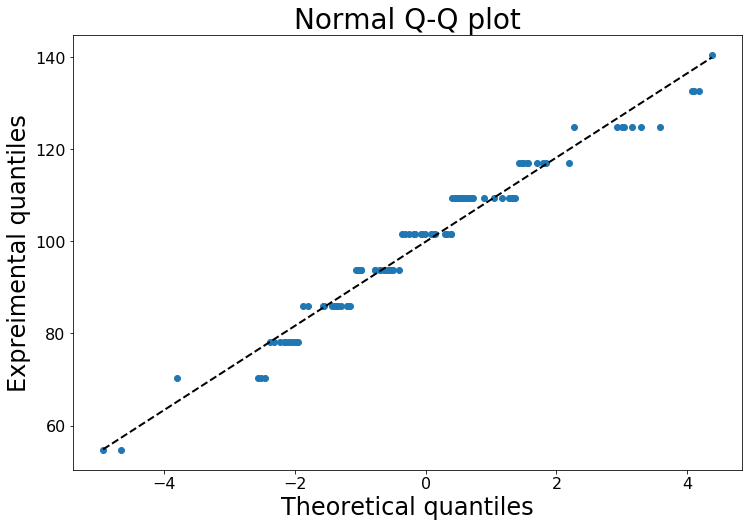

In [40]:
import numpy.random as random

data = ccss.query("s0 == '北京'& time == '200704'").index1.values.flatten()
data.sort()
norm = random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)   # norm is sample value, p(norm) is reference value

plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

## Homogeneity of Variance 方差齐性检验
### <font color='red'> scipy.stats.levene

用假设检验方法考察方差齐性：<font color='blue'>**H0: 检验组的离散度一样**</font> 
- <font color='red'>**Bartlett's 方差齐性检验**</font>：
        - 基于数据服从正态分布的假设，对其方差齐同性进行检验
        - 数据略微偏离正态分布时，检验结果就会出现较大偏差
```Python
scipy.stats.bartlett(a,b)
```        
- <font color='red'>**Levene 方差齐性检验**</font>：
        - 可用于正态或者非正态分布的资料（平均水平可以使用均数或者中位数等）
        - 在数据可能非正态的情况下，精度比Bartlett检验号
        - 可作为标准的方差齐性检验方法
```Python
scipy.stats.levene(a,b,center = {'mean','median','trimmed'})
```        
- <font color='red'>**Fligner-Killeen 检验**</font>:
        - 一种非参数的方差齐性检验方法，不依赖于具体分布
```Python
scipy.stats.fligner(a,b,center = {'mean','median','trimmed'})
```

In [41]:
ss.bartlett(ccss.index1[ccss.time == 200704],
            ccss.index1[ccss.time == 200712],
            ccss.index1[ccss.time == 200812],
            ccss.index1[ccss.time == 200912])

BartlettResult(statistic=11.12381848334319, pvalue=0.011074841431979916)

In [42]:
ss.levene(ccss.index1[ccss.time == 200704],
            ccss.index1[ccss.time == 200712],
            ccss.index1[ccss.time == 200812],
            ccss.index1[ccss.time == 200912])

LeveneResult(statistic=2.2068913639343792, pvalue=0.08563270755698366)

# 非参数检验 <font color='blue'>Nonparametric Statistical</font> 
https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
- <font color='red'>总体的分布位置/形状进行估计或假设检验</font>
    - 分布类型/形状的检验：检验样本所在总体是否服从已知的理论分布
    - 分布位置检验：检验样本所在总体的分布位置（集中趋势）是否相同 
- Wilcoxon两样本秩和检验
    - **H0:两总体所在的中心位置相同**，中位数可以代表中心位
    - 考察各组秩和的大小是否明显偏离H0
- Mann-Whitney U
    - 基本等价于两样本秩和检验
    - 可近似理解为基于秩次进行了两样本t检验
- Kolmogorov-Smirnov Z
    - 两样本K-S检验，检验效能不高
    - 考察的是**整体分布是否相同**，而不是只针对中心位置
- Kruskal-Wallis H检验
    - 本质上就是**基于秩次的单因素方差分析**，可用于两组或多组

## 独立样本比较的非参数方法<font color='blue'>Independent Samples</font> 
### 两样本比较 <font color='red'> Mann-Whitney U test
如果$n_1 \gt 10 ~or~ n_2 \gt 20$, 则可使用正态近似法
$$\displaystyle U = \frac{|T- n_1(N+1)/2| - 0.5}{\sqrt{n_1 n_2 (N+1)/12}}$$
当相同秩次较多时用校正公式
$$\displaystyle U_c = \frac{U}{c}, ~~~~~~ with ~~~~~ c = 1-\frac{\sum(t_j^3-t_j)}{N^3-N}$$
where $n_1 + n_2 = N $, T 是两组样本秩和中大的值 $T=max(T_1,T_2)$.

```Python
scipy.stats.median_test()           # 中位数检验，两组或多组均可以使用
scipy.stats.ranksums(data1,data2)           # wilcox秩和检验，相对使用较少
scipy.stats.mannwhitneyu(a,b,use_continuity,alternative) # Mann-Whitney U检验，实际使用中一般直接代替Wilcox秩和检验
scipy.stats.ks_2samp(data1,data2)        # 两样本KS检验
```
- Results of Mann-Whitney U test siminary as Ranksum test. 
- 一般使用Mann-Whitney U test，它的适用范围更广, 速度更快.

**Example**: 比较铅作业工人和非铅作业工人的血汞含量是否相同

In [43]:
Hgworker = [0.82,0.87,0.97,1.21,1.64,2.08,2.13]
NoHgworker = [0.24,0.24,0.29,0.33,0.44,0.58,0.63,0.72,0.87,1.01]
ss.median_test(Hgworker,NoHgworker)      # 中位数检验并不是很合适

(4.743303571428572, 0.029412539508284274, 0.82, array([[6, 2],
        [1, 8]]))

In [44]:
stat, p = ss.ranksums(Hgworker,NoHgworker)
alpha = 0.05
if p > alpha:
    print('They are Same.')
else:
    print('They are Different with Statistic value {} and P_value {}.'.format(stat,p))

They are Different with Statistic value 2.976495222493026 and P_value 0.002915636250090396.


In [45]:
stat, p = ss.mannwhitneyu(Hgworker,NoHgworker)
alpha = 0.05
if p > alpha:
    print('They are Same.')
else:
    print('They are Different with Statistic value {} and P_value {}.'.format(stat,p))

They are Different with Statistic value 4.5 and P_value 0.001687762004737896.


In [46]:
stat, p = ss.ks_2samp(Hgworker,NoHgworker)
alpha = 0.05
if p > alpha:
    print('They are Same.')
else:
    print('They are Different with Statistic value {} and P_value {}.'.format(stat,p))

They are Different with Statistic value 0.8 and P_value 0.004000815230063095.


<font color='red'>**Example**: 比较两种药片的疗效是否有差异
结果有问题？

In [47]:
Medicien = pd.read_excel('data/Statistic Practice Data.xlsx',sheet_name='Medicien')
Medicien.head()

,medicine1,Placebo
显效,62,35
有效,18,31
无效,5,14
加重,3,4


In [48]:
stat, p = ss.ranksums(Medicien['medicine1'],Medicien['Placebo'])
alpha = 0.05
if p > alpha:
    print('They are Same with Statistic value {} and P_value {}.'.format(stat,p))
else:
    print('They are Different with Statistic value {} and P_value {}.'.format(stat,p))

They are Same with Statistic value -0.2886751345948129 and P_value 0.7728299926844475.


In [49]:
stat, p = ss.mannwhitneyu(Medicien['medicine1'],Medicien['Placebo'])
alpha = 0.05
if p > alpha:
    print('They are Same with Statistic value {} and P_value {}.'.format(stat,p))
else:
    print('They are Different with Statistic value {} and P_value {}.'.format(stat,p))

They are Same with Statistic value 7.0 and P_value 0.44261695723660077.


In [50]:
stat, p = ss.ks_2samp(Medicien['medicine1'],Medicien['Placebo'])
alpha = 0.05
if p > alpha:
    print('They are Same with Statistic value {} and P_value {}.'.format(stat,p))
else:
    print('They are Different with Statistic value {} and P_value {}.'.format(stat,p))

They are Same with Statistic value 0.25 and P_value 0.9968756885202118.


### 多样本比较 <font color='red'>Kruskal-Wallis Test (H test)
- Kruskar-Wallis Test often used to test whether independent sample groups are drawn from population possessing **equal medians**.
- Kruskar-Wallis enjoys the same power properties relative to the one-way ANOVA F-test.
- Method:
$$\displaystyle H = \left[\frac{12}{n(n+1)}\sum_{i=1}^{k} \frac{R_i^2}{n_i}\right]-3(n+1)$$ 
    - where $R_i$ is the sum of the ranks assigned to the *ith* sample group.
    - As the sample sizes in each group get large ($k \gt 3 ~or~ n_i \gt 5$), the test statistic H may be approximated by the $\chi^2$ distribution with (k-1) degrees of freedom. 
    - 当组数 $k \leq 3 ~and~ n_i \leq 5$, 查H界值表确定P.
    - 当相同秩次较多时用校正公式
$$\displaystyle H_c= \frac{H}{c},~~~~~~~ c=1-\frac{\sum(t_j^3-t_j)}{n^3-n}$$ 
where $t_j$为第j个相同秩次的个数。



```Python
scipy.stats.kruskal(sample1,sample2,....,nan_policy='propagate')   # propagate,raise,omit
```

**Example**: 比较A,B,C三种方法的疗效是否相同. 

In [51]:
ABC = pd.read_excel('data/Statistic Practice Data.xlsx',sheet_name='ABC')
ABC.head()

,MethodA,MethodB,MethodC
治愈,186,32,22
显效,72,24,14
好转,26,16,22
无效,24,20,20


In [52]:
stat, p = ss.kruskal(ABC['MethodA'],ABC['MethodB'],ABC['MethodC'])
alpha = 0.05
if p > alpha:
    print('They are Same with Statistic value {} and P_value {}.'.format(stat,p))
else:
    print('They are Different with Statistic value {} and P_value {}.'.format(stat,p))

They are Same with Statistic value 5.859540636042407 and P_value 0.05340930389113663.


## 非独立变量比较的非参数方法<font color='blue'>Dependent Samples</font> 
### 配对样本比较 <font color='red'>Wilcoxon Signed Rank test</font>
- A two sample t-test would have been a good choice if the test and control groups are independent and follow Normal distribution. 
- If conditions are not met, nonparametric test methods are needed. This section covers one such test, called <font color='blue'>Wilcoxon signed-rank test (equivalent to the Mann-Whiney U-test) for two samples</font>. 
- The test is preferred when:
    - Compare the difference between two means to zero (H0: $\mu$ of the difference = 0).
    - The two groups of data are dependent.(**Paired data**)
    - The type of variable could be continuous or ordinal.
    - The data might not be normally distributed.(**Not Normlly distributiong**)
- Wilcoxo 符号秩检验
    - 求出各组配对差值
    - 基于H0假定成立，差值应当围绕0上下对称分布
    - 按照差值绝对值计算秩次，然后分正、负组分别结算秩和
    - 考察正负秩和的大小是否明显偏离H0
    
<font color='red'>**H0: 两组结果相同，即差值的中位数等于0，Md=0；**</font>

```Python
scipy.stats.willcoxon(a,b,zero_method='wilcox'/'zsplit',correction=Fales/True)
# pratt: 检验中包括0差值， wilcox: 丢弃0差值，  zsplit:将0差值对半分入两组  
```

#### 配对设计资料的符号秩和检验
Example: 先后出生的孪生兄弟智力是否存在差异

In [53]:
Twin = pd.read_excel('data/Statistic Practice Data.xlsx',sheet_name='Twins')
stat, p = ss.wilcoxon(Twin['Older'], Twin['Younger'],zero_method='wilcox',correction=False)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=18.500, p=0.358
Same distribution (fail to reject H0)


#### 单样本符号秩检验
- 比较某组样本中位数与给定值有无统计学差异

**Example**: 检验工人的氟含量是否与正常人存在差异

In [54]:
worker = [2.15,2.10,2.20,2.12,2.42,2.52,2.62,2.70,3.00,3.18,3.87,5.67]
normal = [2.15]*len(worker)
stat, p = ss.wilcoxon(worker,normal,zero_method='wilcox',correction=False)
alpha = 0.05
if p > alpha:
    print('They are Same.')
else:
    print('They are Different with P_value {}'.format(p))

They are Different with P_value 0.007645761692991623


### 配伍样本比较 <font color='red'>Friedman Test (M test)
- Friedman Test (M test) 双向秩方差分析
    - 配伍因素影响很大，不能忽视
    - 在配伍因素必须考虑的前提下，基于H0假设进行区组内编秩
    - 按照比较组计算秩和，并比较其是否明显偏离H0 假设
    - 这实际上是一个没什么用的方法
        - 配伍设计的资料很难遇到不符合应用条件的情形
        - 该检验效能非常低，与其采用秩和检验，不如进行变量变换
- Kendall's W
    - 主要用于计算Kendall和协系数，用于表示K个指标间的关联程度
- Cochran's Q
    - 是McNemar检验针对多组的推广，只适用于两分类的治疗
    - Friedman双向秩方差分析只适用于连续变量
```Python
scipy.stats.friedmanchisquare(measurement1,measurement2,measurement3)
# friedman卡方检验，至少需要提供三组数据
```

**Example**: 治疗前后不同周数SGPT含量的是否有变化

In [55]:
SGPT = pd.read_excel('data/Statistic Practice Data.xlsx',sheet_name='SGPT')
SGPT.head()

,ID,Before,1Week,2Week,3Week
0,1,63,188,138,63
1,2,90,238,220,144
2,3,54,300,83,92
3,4,45,140,213,100
4,5,54,175,150,36


In [56]:
stat, p = ss.friedmanchisquare(SGPT['Before'],SGPT['1Week'],SGPT['2Week'],SGPT['3Week'])
alpha = 0.05
if p > alpha:
    print('They are Same.')
else:
    print('They are Different with P_value {}'.format(p))

They are Different with P_value 0.0005993630793139178


# 样本量估计 <font color='red'>(spower.TTestPower)</font>
## 样本量估计的基本原理
<font color='red'>$$\displaystyle \delta = \left[ Z_{1-\alpha/2} + Z_{1-\beta}   \right]*S.E.$$</font>
where S.E. is the standard error.
- Effect size=$\delta/\sigma$, $\sigma$ is standard deveriation. 即希望能够检验出的相对差异.
- 实际使用中需要加上10%～20%的例数，以补充可能的损失

## 单样本/配对样本t-test
- 单样本/配对样本 
$\displaystyle N=[\frac{(Z_{1-\alpha/2} + Z_{1-\beta})\sigma}{\delta}]^2$,  $\displaystyle Z_{1-\beta} = \delta\frac{\sqrt{N}}{\sigma}-Z_{1-\alpha/2}$

- TTestPower 类
```Python
class statsmodels.stats.powers.TTestPower()
```
- TTestPower 类的方法
    - **计算检验效能**
```Python
power(                          # 计算相应检验效能，输出：检验效能值
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs                        # 设定的样本量
    alpha                       # alpha水准
    df = None                   # 自由度
    alternative = 'two-sided'/'larger'/'smaller')
```
    - **计算缺失参数, 样本量**
```Python
solve_power(                    # 基于检验效能反推任何一个参数，输出：缺失的相应参数
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs                        # 设定的样本量
    alpha                       # alpha水准
    power = None                   
    alternative = 'two-sided'/'larger'/'smaller')
```
    - **绘制样本量与检验效能的曲线图**
```Python
plot_power([dep_var,nobs,effect_size,..])          
```
- 研究新药降低高血脂患者的胆固醇的效果，研究者规定试验组的血清胆固醇平均降低$\delta=$0.5mmol/L以上，才有进一步研究的价值。引用文献中胆固醇的标准差为$\sigma=$0.8mmol/L，规定单侧$\alpha=0.05$, power=0.90, 要求估计样本量。

In [5]:
sp1 = spower.TTestPower()
# 计算样本量
sp1.solve_power(effect_size=0.5/0.8,nobs=None,alpha=0.05,
               power=0.9,alternative='larger')            

23.34488303343584

In [6]:
# 计算检验效能,power=0.9
sp1.power(effect_size=0.5/0.8, nobs=24, alpha=0.05,alternative='larger')

0.9074198379719143

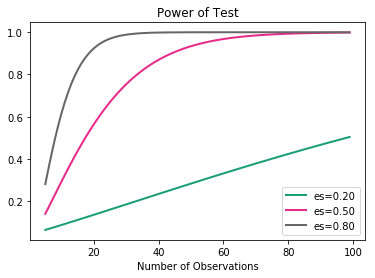

In [11]:
# parameters for power analysis
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
sp1.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes);

## 成组两样本
$\displaystyle N=[\frac{(Z_{1-\alpha/2} + Z_{1-\beta})\sigma}{\delta}]^2 (\frac{1}{Q_1}+\frac{1}{Q_2})$, 
where $n_1 = NQ_1$ and $n_2 = NQ_2$ with the assumpation $\sigma_1=\sigma_2=\sigma$.

- TTestPower 类的方法
    - **计算检验效能**
```Python
power(                          # 计算相应检验效能，输出：检验效能值
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs1                        # 设定的样本量
    alpha                       # alpha水准
    ratio =1                    # 两组样本量之比，组2=组1*ratio  
    df = None                   # 自由度
    alternative = 'two-sided'/'larger'/'smaller')
```
    - **计算缺失参数, 样本量**
```Python
solve_power(                    # 基于检验效能反推任何一个参数，输出：缺失的相应参数
    effect_size                 # 标准化（差值/标准差）之后希望检出的差距，必须为正值
    nobs1                        # 设定的样本量
    alpha                       # alpha水准
    power = None                   
    ratio = 1
    alternative = 'two-sided'/'larger'/'smaller')
```
- 研究新药降低高血脂患者的胆固醇的效果，研究者规定试验组与对照组相比的，血清胆固醇平均降低0.5mmol/L以上，才有进一步研究的价值。引用文献中胆固醇的标准差为0.8mmol/L，规定单侧$\alpha=0.05$,power=0.90,要求估计样本量。

In [12]:
sp2 = spower.TTestIndPower()
# 计算样本量, N1=N2
sp2.solve_power(effect_size=0.5/0.8,nobs1=None,alpha=0.05,
               power=0.9, ratio = 1.0, alternative='larger')

44.53997146070881

In [13]:
# 计算样本量，N2=2*N1
sp2.solve_power(effect_size=0.5/0.8,nobs1=None,alpha=0.05,
               power=0.9, ratio = 2.0, alternative='larger')

33.34598279030115

In [15]:
# 计算 effect_size
sp2.solve_power(effect_size=None, nobs1= 44,alpha=0.05,
               power=0.9, ratio = 1.0, alternative='larger')

0.6288840135160791

In [17]:
# 计算 Power
sp2.solve_power(effect_size=0.5/0.8, nobs1= 44,alpha=0.05,
               power=None, ratio = 1.0, alternative='larger')

0.8967899865606673

## 多组均值比较的样本量计算 (单因素方差分析)
- 实用：根据最重要的两样本组数据的特征进行样本总量外推
- 严格：基于组间变异进行计算
    - 难点在于计算effect size
    
$\displaystyle f=\sqrt{\frac{\sum^k_{i=1}p_i(\mu_i-\mu)^2}{\sigma^2}}$
where $p_i=n_i/N$,$n_i$ is the number of observations in group i,
N is total number of observations,
$\mu_i$ is the mean of group i,
$\mu$ is grand mean,
$\sigma^2$ is error variance within groups.
    - Cohen建议将 f=0.1，0.25，0.4分别作为小、中、大的效应值进行估计

- FTestAnovaPower 类
```Python
class statsmodels.stats.powers.FTestAnovaPower()
```
- FTestAnovaPower 类的方法
```Python
solve_power(                    # 基于检验效能反推任何一个参数，输出：缺失的相应参数
    effect_size                 # 各组加权综合计算出的效应值 f，必须为正值
    nobs                       
    alpha                       # alpha水准
    power = None                   
    k_groups = 2）               # 用于比较的样本组数  
```

In [20]:
sp3 = spower.FTestAnovaPower()
sp3.solve_power(effect_size=0.1,nobs=None,alpha=0.05,
               power=0.9, k_groups = 3)

1268.3933013043206

In [21]:
sp3 = spower.FTestAnovaPower()
sp3.solve_power(effect_size=0.25,nobs=None,alpha=0.05,
               power=0.9, k_groups = 3)

205.49086168426783

In [22]:
sp3 = spower.FTestAnovaPower()
sp3.solve_power(effect_size=0.4,nobs=None,alpha=0.05,
               power=0.9, k_groups = 3)

82.16474744262409

## 单样本/配对率的比较
$\displaystyle N=[\frac{(Z_{1-\alpha/2} + Z_{1-\beta})}{\delta}]^2 \pi(1-\pi)$

$\displaystyle Effect~Size = \frac{\delta}{\sigma} = \frac{\delta}{\sqrt{\pi(1-\pi)}}$

$\displaystyle Effect~Size = 2(\sin^{-1}{\sqrt{\pi_1}}-\sin^{-1}{\sqrt{\pi_2}})$

- 常规条件下，某动物模型出现阳性结局的概率为0.4，某研究人员考虑采用另一种方法进行试验，使用60个动物进行该研究，预期的成功率为0.5，请估计该检验的效能是否充足

In [36]:
h = 0.1/(0.5*(1-0.5))**0.5
sp1.solve_power(effect_size = h, nobs = 60, alpha = 0.05, power = None)

0.3316786460038084

In [37]:
h = 2*(np.arcsin(np.sqrt(0.4))-np.arcsin(np.sqrt(0.5)))
sp1.solve_power(effect_size = h, nobs = 60, alpha = 0.05, power = None)

0.3354309335796794

检验效能只有0.33. 当检验效能 $1-\beta < 0.75$ 时，认为结论不可靠，样本量过小，应增加样本量重新研究。

## 两样本率的比较
$\displaystyle \delta=(Z_{1-\alpha/2} + Z_{1-\beta}) \left[ \frac {\pi_1(1-\pi_1)}{n_1} + \frac {\pi_2(1-\pi_2)}{n_2} \right]^{1/2}$

- Assumption $\pi_1 = \pi_2$ and $n_1 = n_2$

$\displaystyle \delta^2=(Z_{1-\alpha/2} + Z_{1-\beta})^2 \left[ \frac {4\pi(1-\pi)}{N} \right]$

- Assumption $n_1 = n_2 = N$

$\displaystyle \delta^2=(Z_{1-\alpha/2} + Z_{1-\beta})^2 \left[ \frac {\pi_1(1-\pi_1) + \pi_2(1-\pi_2)}{N} \right]$

$\displaystyle N =\left[\frac{(Z_{1-\alpha/2} + Z_{1-\beta})}{\delta}\right]^2 \left[\pi_1(1-\pi_1) + \pi_2(1-\pi_2) \right]$

- 某动物模型出现阳性结局的概率为0.15，现考虑采用改进的新方法进行比较，预期新方法阳性概率为0.3，请估计该实验所需的动物样本量

In [66]:
Za = ss.norm.ppf(1-0.025)
Zb = ss.norm.ppf(1-0.8)
print(Za,Zb)
N = ((abs(Za)+abs(Zb))/(0.3-0.15))**2 * (0.15*(1-0.15) + 0.3*(1-0.3))
N

1.959963984540054 -0.8416212335729143


117.73319601523633

In [68]:
Za = ss.norm.ppf(0.025)
Zb = ss.norm.ppf(1-0.8)
print(Za,Zb)
N = ((Za+Zb)/(0.3-0.15))**2 * (0.15*(1-0.15) + 0.3*(1-0.3))
N

-1.9599639845400545 -0.8416212335729143


117.73319601523637

In [69]:
p1 = 0.3; p2 = 0.15
h = 2*(np.arcsin(np.sqrt(p1))-np.arcsin(np.sqrt(p2)))
h

0.3638806505432649

In [70]:
# 使用两样本t检验框架
sp2.solve_power(effect_size = h, nobs1 = None, alpha = 0.05, power = 0.8, 
                alternative = 'larger')

94.06942058074941

In [71]:
sp2.solve_power(effect_size = None, nobs1 = 117, alpha = 0.05, power = 0.8, 
                alternative = 'larger')

0.3260436054049059

## 配对设计率比较
$\displaystyle \pi_1 = \frac{b}{a+b},~~~~\pi_2 = \frac{c}{a+c},~~~~\pi = \frac{\pi_1 + \pi_2}{2}$

$\displaystyle N = \left[\frac{Z_{1-\alpha} \sqrt{2\pi} + Z_{1-\beta} \sqrt{2\pi_1\pi_2/\pi}}{\pi_1-\pi_2}\right]^2$

# Prediction
## Linear regression analysis
Samples $(x_1,y_1),(x_2,y_2)...(x_n,y_n),$ 
$$\displaystyle \bar{y} = \frac{1}{n}\sum_i^n y_i, ~~~~~~~\bar{x} = \frac{1}{n}\sum_i^n x_i$$
$$\displaystyle S_{xx}=\sum(x_i-\bar{x})^2$$
$$\displaystyle S_{yy}=\sum(y_i-\bar{y})^2$$
$$S_{xy}=\sum(x_i-\bar{x})(y_i-\bar{y})$$
$$\displaystyle \widehat{b}=\frac{S_{xy}}{S_{xx}},~~~~~~ \widehat{a}= \bar{y} - \widehat{b}\bar{x}$$
在误差为正态分布的假定下，最小二乘估计等价于极大拟然估计.

Linear regression equation
        $$\displaystyle \widehat{y_i} = \widehat{a}+\widehat{b} x_i +\varepsilon_i = \bar{y}+\widehat{b}(x-\bar{x})$$ 
where $\varepsilon_i \sim N(0,\sigma^2)$.
- **Properties of $a,b$**
    - $\displaystyle \widehat{a} \sim N(a,\frac{\sum x_i^2}{n S_{xx}}\sigma^2$) and $\displaystyle \widehat{b} \sim N(b,\frac{\sigma^2}{S_{xx}}$), $\widehat{a},\widehat{b}$ are unbiase estimate of $a,b$无偏估计。
    - 残差平方和：$\displaystyle Q = \sum{(y_i-\widehat{y}_i)^2}$, $Q=S_{yy} -\widehat{b}S_{xy}$
    - $\displaystyle \widehat{\sigma} ^2 = \frac{Q}{n-2}$ is unbiase estimate of $\sigma^2$
    - $\displaystyle \frac{Q}{\sigma^2}\sim \chi^2(n-2)$
    
- **线性假设的显著性检验**
$H0: \widehat{b} =0$
    - t test:
$(1-\alpha)$ 水平的拒绝域 $\displaystyle|t|=\frac{|\widehat{b}|}{\widehat{\sigma}}\sqrt{S_{xx}} \geq t_{\alpha/2}(n-2)$

    - F test:
$(1-\alpha)$ 水平的拒绝域为
$\displaystyle F=\frac{(n-2)\sum{(\widehat y_i -\bar{y})^2}}{\sum({\widehat{y_i}-y_i})^2} \gt F_\alpha (1,n-2)$

    - Correlation coefficent test:
$$\displaystyle r=\frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum{(x_i-\bar{x})^2(y_i-\bar{y})^2}}}=\frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}$$

    - Coefficent of determination: $$\displaystyle R^2 = r^2 = \frac{S_{xy}^2}{S_{xx}S_{yy}}$$

- **回归系数的置信区间**
    - b 的$(1-\alpha)$置信区间:
$\displaystyle \widehat{b}\pm t_{\alpha/2}(n-2)\frac{\widehat{\sigma}}{\sqrt{S_{xx}}}$

### Confidence Interval & Prediction Interval
- Confidence interval:
    - $\widehat{y_i} = \widehat{a}+\widehat{b} x_i$ 的$(1-\alpha)$置信区间:
$\displaystyle \widehat{y_i} \pm t_{\alpha/2}(n-2) \widehat{\sigma}\sqrt{\frac{1}{n}+\frac{(x_i-\bar{x})^2}{S_{xx}}}$
    - A 95% confidence interval for the mean states that you're 95% confident your interval contains the population mean of Y for a particular X. 
    - Confidence intervals become wider as you move away from the mean of the independent variable. This reflects the fact that your estimates become more variable as you move away from the means of X and Y.

- Prediction Interval:
    - 对因变量$y$的新观测值$y_0$进行点预测(区间预测): $\widehat{y_i} = \widehat{a}+\widehat{b} x_i +\varepsilon_i$ 的$(1-\alpha)$置信区间:
$\displaystyle \widehat{y_i} \pm t_{\alpha/2}(n-2) \widehat{\sigma}\sqrt{1+\frac{1}{n}+\frac{(x_i-\bar{x})^2}{S_{xx}}}$
    - Making a prediction for a future single observation.
    - A 95% prediction interval is one that you are 95% confident contains a new observation if you were to actually sample another observation. 
    - Prediction intervals are wider than confidence intervals, because single observations have more variability than means.

- **Standardizing $(x_i,y_i)$ coordinates for Linear Regression**:
$$\displaystyle \bar{x}=\bar{y}=0,~~~~ S_{xx} = S_{yy} = 1$$
$$\displaystyle \widehat{a} = 0,~~~~ \widehat{b} = r= S_{xy} $$

- According to **Gaussians Algebra**:
$$\displaystyle \phi(0,\sigma_y^2) = \phi(0,\beta^2\sigma_x^2) + \phi(0,\sigma^2_{\varepsilon})$$ and $\sigma_y^2 = \sigma_x^2 = 1$, then
$$\displaystyle 1 = \beta^2 + \sigma^2_{\varepsilon} = R^2 + \sigma^2_{\varepsilon}$$


** Assumptions in Linear Regression**
- The mean of y is linearly related to the value of x.
- The error terms are normally distributed with a mean of 0.
- The error terms have equal variances.
- The error terms are independent at each value of the predictor variable.

In [57]:
X = [0.03, 0.04, 0.05, 0.07, 0.09, 0.10, 0.12, 0.15, 0.17, 0.20]
Y = [40.5, 39.5, 41.0, 41.5, 43.0, 42.0, 45.0, 47.0, 53.0, 56.0]
Xbar = Ybar = 0.0
n = len(X)
for i in range(n):
    Xbar += X[i]
    Ybar += Y[i]
Xbar = Xbar/n
Ybar = Ybar/n
Sxx = Syy = Sxy = 0.0
for i in range(n):
    Sxx += (X[i]-Xbar)**2
    Syy += (Y[i]-Ybar)**2
    Sxy += (X[i]-Xbar)*(Y[i]-Ybar)
b = Sxy/Sxx
a = Ybar-b*Xbar
print('The linear regression equation is y={}*x + {}'.format(b,a))

# $\sigma^2$无偏估计
sigma2 = ((Syy-b*Sxy)/(n-2))
print("Estimate of sigma2 is {}".format(sigma2))

# Correlation coefficient
R2 = Sxy/Sxx/Syy
print("Correlation coefficient is {}".format(R2))

# For x = 0.06, 95% confidence interval for predict y_hat 
t_alpha = ss.t.ppf(1.0 - 0.025, n-2)           # t(P,df)

pm = t_alpha*sigma2**0.5*(1/n+(0.06-Xbar)**2/Sxx)**0.5
print('pm is {}, yhat is {}'.format(pm,b*0.06+a))
yUp = b*0.06+a + pm
yLow = b*0.06+a - pm
print("The 95% confidence interval of x=0.06 is [{},{}]".format(yLow,yUp))

The linear regression equation is y=91.83467741935485*x + 35.48286290322581
Estimate of sigma2 is 3.6926033266128897
Correlation coefficient is 0.3273671773259241
pm is 1.7684757843577488, yhat is 40.992943548387096
The 95% confidence interval of x=0.06 is [39.22446776402935,42.76141933274484]


In [58]:
xx = [0.03, 0.04, 0.05, 0.07, 0.09, 0.10, 0.12, 0.15, 0.17, 0.20]
yy = [40.5, 39.5, 41.0, 41.5, 43.0, 42.0, 45.0, 47.0, 53.0, 56.0]
slope,intercept,r_value,p_value,std_err = ss.linregress(xx,yy)
print(slope,intercept,r_value,p_value,std_err )

91.83467741935485 35.48286290322581 0.9458829185643172 3.5142213109032764e-05 11.139093897468324
